In [2]:
#-*- coding: utf-8 -*-
#arima时序模型

import pandas as pd
#时序图
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot,plot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

df=pd.read_csv('gun-violence-data_01-2013_03-2018.csv')
df=df[['date','n_killed']]
df.to_csv('data_nkilled.csv')

In [8]:
discfile = 'data_nkilled.csv'
forecastnum = 5


#读取数据，指定日期列为指标，Pandas自动将“日期”列识别为Datetime格式
data = pd.read_csv(discfile)
data=data.iloc[:,1:]

#处理数据，只需要2018年的数据
data17=data[data['date'].astype('datetime64').dt.year==2017 ]
data18=data[data['date'].astype('datetime64').dt.year==2018 ]
data2=data18[data18['date'].astype('datetime64').dt.month<=2]
#data3=data[data['date'].astype('datetime64').dt.month==3]
#data3=data3[data3['date'].astype('datetime64').dt.day>15]
mydata=pd.DataFrame()
mydata=mydata.append(data17)
mydata=mydata.append(data2)
#mydata=data
mydata.head()

j:\Anaconda3\lib\site-packages\pandas\core\internals.py:3224: FutureWarning:

Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.



,date,n_killed
164474,2017-01-01,1
164475,2017-01-01,0
164476,2017-01-01,0
164477,2017-01-01,0
164478,2017-01-01,0


In [9]:
temp=mydata.groupby('date').agg({'n_killed' : 'sum'})
temp.head()

,n_killed
date,
2017-01-01,74
2017-01-02,37
2017-01-03,48
2017-01-04,34
2017-01-05,31


In [10]:
temp.index

Index(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
       '2017-01-06', '2017-01-07', '2017-01-08', '2017-01-09', '2017-01-10',
       ...
       '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22', '2018-02-23',
       '2018-02-24', '2018-02-25', '2018-02-26', '2018-02-27', '2018-02-28'],
      dtype='object', name='date', length=423)

In [11]:
trace1=go.Bar(x=temp.index,y=temp['n_killed'])
data = [trace1]
layout =dict(height=400, title='2017-2018年被杀人数统计', legend=dict(orientation="h"));
fig = go.Figure(data=data, layout=layout)
iplot(fig)

j:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



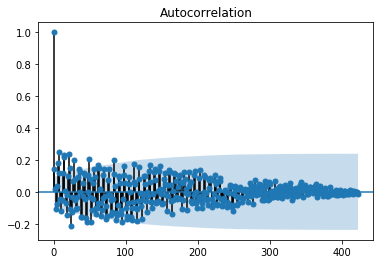

In [12]:
#自相关图
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(temp)
plt.show()

In [13]:
#平稳性检测
from statsmodels.tsa.stattools import adfuller as ADF
print(u'原始序列的ADF检验结果为：', ADF(temp['n_killed']))

原始序列的ADF检验结果为： (-3.0443905852697957, 0.03095172945803373, 14, 408, {'1%': -3.446479704252724, '5%': -2.8686500930967354, '10%': -2.5705574627547096}, 2874.7803552969235)


ADF检验结果显示p=0.03<0.05，说明不存在显著自相关性

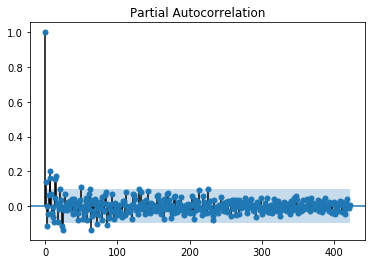

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(temp)
plt.show() #偏自相关图

In [15]:
#白噪声检验
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(temp, lags=1)) #返回统计量和p值

差分序列的白噪声检验结果为： (array([8.36275837]), array([0.00382989]))


p=0.001<0.00,说明该序列是非白噪声的稳定序列，可以进行下一步的分析

In [16]:
from statsmodels.tsa.arima_model import ARMA
temp=temp.astype(float)
model = ARMA(temp, (1,1,1)).fit() #建立ARIMA(0, 1, 1)模型
model.summary2() #给出一份模型报告
model.forecast(3) #作为期5天的预测，返回预测结果、标准误差、置信区间。

j:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

j:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

j:\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



(array([40.01428989, 42.05286687, 42.33799725]),
 array([8.95947756, 9.05342063, 9.05524871]),
 array([[22.45403655, 57.57454324],
        [24.3084885 , 59.79724523],
        [24.59003592, 60.08595858]]))

In [17]:
data_test=data18[data18['date'].astype('datetime64').dt.month==3]
data_test=data_test.groupby('date').agg({'n_killed' : 'sum'})
data_test.head()

j:\Anaconda3\lib\site-packages\pandas\core\internals.py:3224: FutureWarning:

Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.



,n_killed
date,
2018-03-01,33
2018-03-02,41
2018-03-03,29
2018-03-04,32
2018-03-05,51
